In [13]:
import numpy as np
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
mnist = fetch_mldata('MNIST original', data_home="./scikit_learn_data")

In [3]:
mnist.data.shape

(70000, 784)

In [4]:
mnist.target.shape

(70000,)

In [5]:
num_samples = 5000
sample = np.random.randint(mnist.data.shape[0],size=num_samples)
X = mnist.data[sample]
y = mnist.target[sample]

In [6]:
X.shape, y.shape

((5000, 784), (5000,))

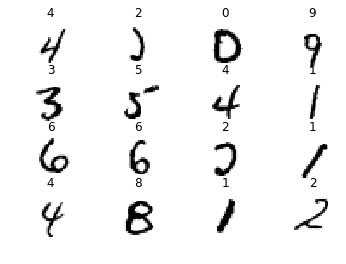

In [8]:
sample_viz = X.reshape((-1,28,28))
for index,val in enumerate(np.random.randint(num_samples,size=16)):
    plt.subplot(4,4,index+1)
    plt.axis('off')
    plt.imshow(sample_viz[val],cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('%i' % y[val])
plt.show()

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,train_size=0.7)

In [14]:
knn = KNeighborsClassifier(3)

In [15]:
knn.fit(Xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [20]:
print(knn.predict(Xtrain[10:15]))
print(ytrain[10:15])

[5. 3. 2. 9. 4.]
[5. 3. 2. 9. 4.]


In [22]:
1-knn.score(Xtest,ytest)

0.07266666666666666

In [23]:
error = list()
for k in range(2,15):
    knn = KNeighborsClassifier(k)
    knn.fit(Xtrain,ytrain)
    error.append(1-knn.score(Xtest,ytest))
print(error)

[0.09533333333333338, 0.07266666666666666, 0.08133333333333337, 0.07733333333333337, 0.08066666666666666, 0.07999999999999996, 0.07866666666666666, 0.08199999999999996, 0.08533333333333337, 0.08599999999999997, 0.09199999999999997, 0.08999999999999997, 0.09533333333333338]


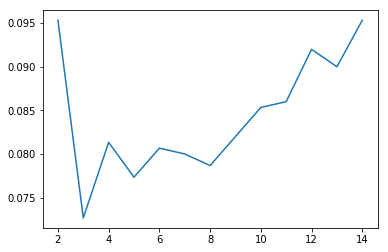

In [25]:
plt.plot(range(2,15),error)
plt.show()

In [39]:
knn = KNeighborsClassifier(3)
knn.fit(Xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [50]:
predict = knn.predict(Xtest)

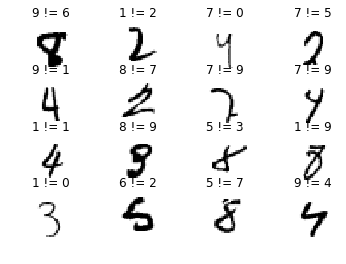

In [51]:
predict_viz = Xtest.reshape((-1,28,28))
misclassified = predict_viz[ytest != predict]
misclassified_labels = predict[ytest != predict]
for index,val in enumerate(np.random.randint(misclassified.shape[0],size=16)):
    plt.subplot(4,4,index+1)
    plt.axis('off')
    plt.imshow(misclassified[val],cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('%i != %i' % (misclassified_labels[val],predict[val]))
plt.show()

In [54]:
type(mnist.data)

numpy.ndarray